In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from PIL import Image
import os

# Set the path to the directory containing the images
path = '/kaggle/input/mango-leaf-disease-dataset/'
dict1=dict(
    anth = "Anthracnose/",
    bact = "Bacterial Canker/",
    cut = "Cutting Weevil/",
    die = "Die Back/",
    gall = "Gall Midge/",
    heal = "Healthy/",
    powder = "Powdery Mildew/",
    sooty = "Sooty Mould/",
)

# Set the size to resize the images to
size = (128,128)

# Set the path to the directory to save the resized images
output_path = '/kaggle/working/resized_images/'

# Create the output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Loop over all the categories
for category, subdirectory in dict1.items():
    # Create the subdirectory in the output directory for this category
    category_output_path = os.path.join(output_path, subdirectory)
    if not os.path.exists(category_output_path):
        os.makedirs(category_output_path)

    # Loop over all the image files in the directory for this category
    for filename in os.listdir(os.path.join(path, subdirectory)):
        # Open the image file
        img = Image.open(os.path.join(path, subdirectory, filename))

        # Resize the image
        img = img.resize(size)

        # Save the resized image to the output directory for this category
        output_filename = os.path.join(category_output_path, filename)
        img.save(output_filename)

In [3]:
from PIL import Image
import os

# Set the path to the directory containing the images
path = '/kaggle/input/mango-leaf-disease-dataset/'
dict1=dict(
    anth = "Anthracnose/",
    bact = "Bacterial Canker/",
    cut = "Cutting Weevil/",
    die = "Die Back/",
    gall = "Gall Midge/",
    heal = "Healthy/",
    powder = "Powdery Mildew/",
    sooty = "Sooty Mould/",
)

# Set the size to resize the images to
size = (64,64)

# Set the path to the directory to save the resized images
output_path = '/kaggle/working/resized_images2/'

# Create the output directory if it does not exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Loop over all the categories
for category, subdirectory in dict1.items():
    # Create the subdirectory in the output directory for this category
    category_output_path = os.path.join(output_path, subdirectory)
    if not os.path.exists(category_output_path):
        os.makedirs(category_output_path)

    # Loop over all the image files in the directory for this category
    for filename in os.listdir(os.path.join(path, subdirectory)):
        # Open the image file
        img = Image.open(os.path.join(path, subdirectory, filename))

        # Resize the image
        img = img.resize(size)

        # Save the resized image to the output directory for this category
        output_filename = os.path.join(category_output_path, filename)
        img.save(output_filename)

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
Powdery_Mildew = "/kaggle/working/resized_images/Powdery Mildew"
Anthracnose = "/kaggle/working/resized_images/Anthracnose"
Healthy = "/kaggle/working/resized_images/Healthy"
Cutting_Weevil = "/kaggle/working/resized_images/Cutting Weevil"
Die_Back = "/kaggle/working/resized_images/Die Back"
Sooty_Mould = "/kaggle/working/resized_images/Sooty Mould"
Bacterial = "/kaggle/working/resized_images/Bacterial Canker"
Gall = "/kaggle/working/resized_images/Gall Midge"

In [6]:
import matplotlib.pyplot as plt
from math import isnan

In [7]:
pic_size = 128

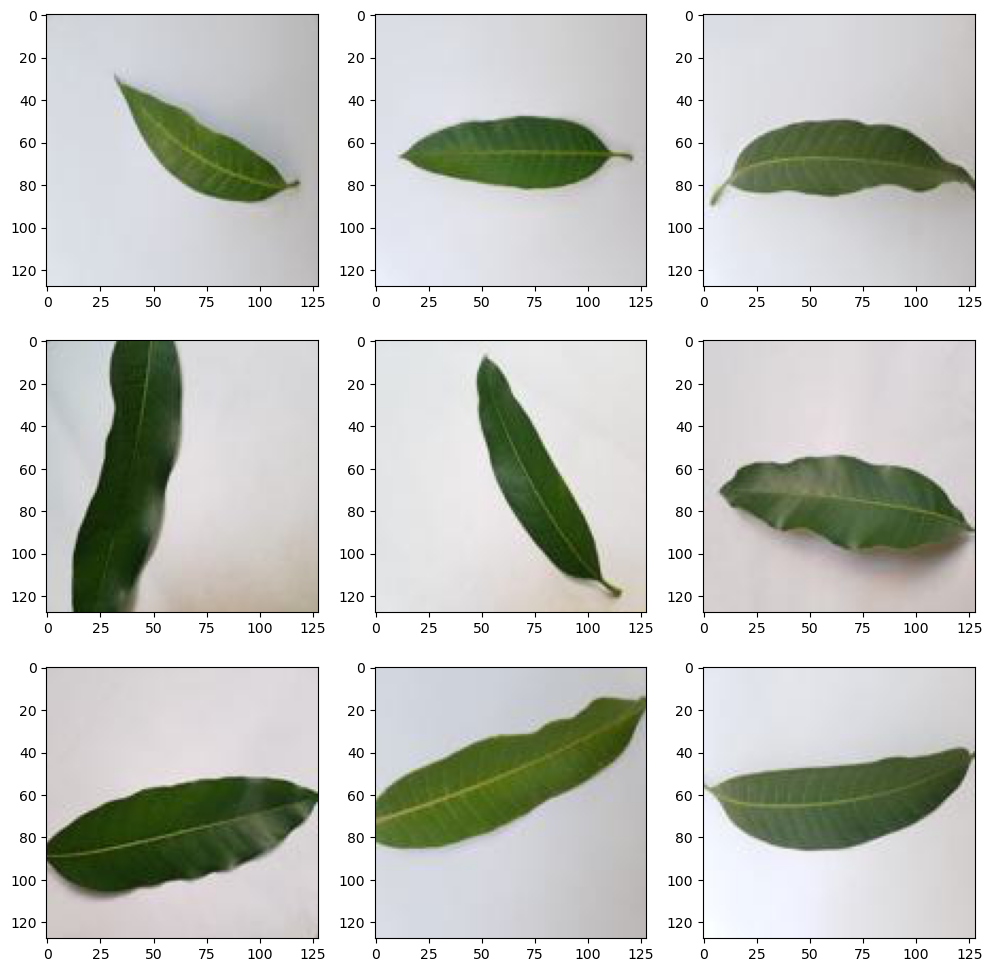

In [8]:
type = 'healthy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Healthy+"/"+
                  os.listdir(Healthy)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

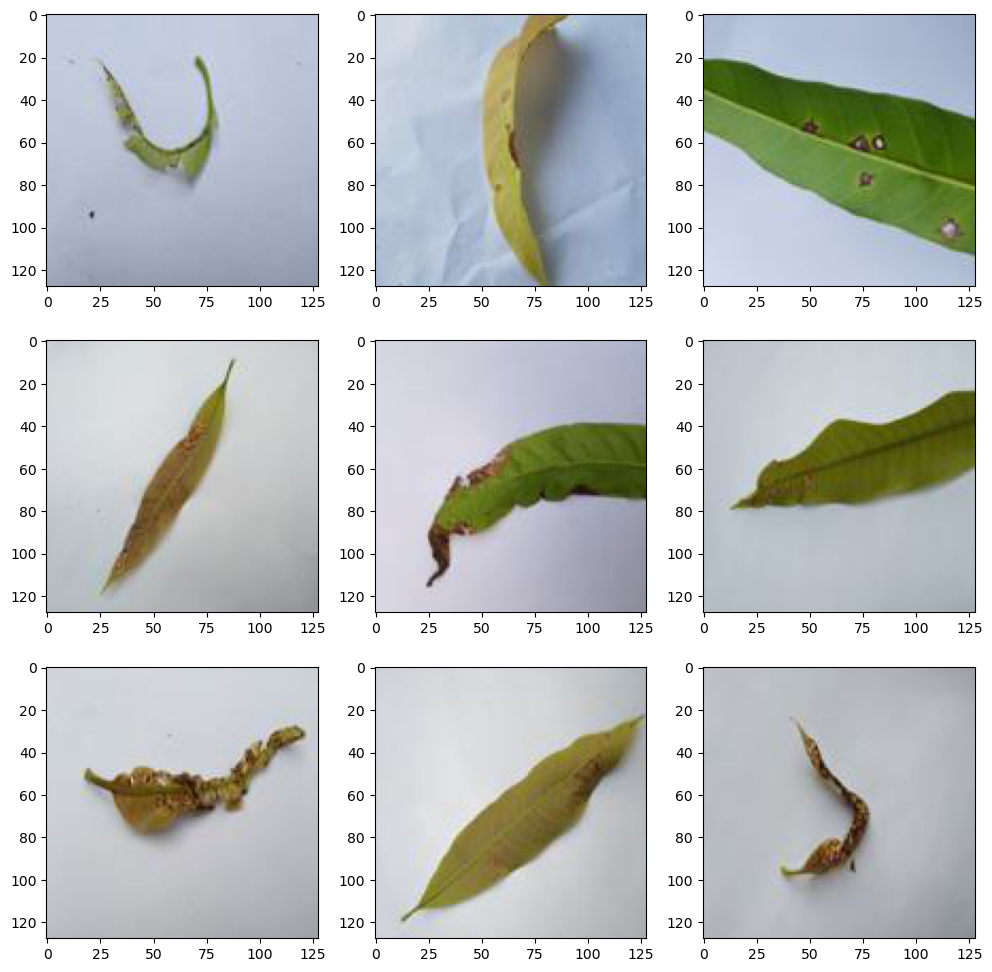

In [9]:
type = 'Anthracnose'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Anthracnose+"/"+
                  os.listdir(Anthracnose)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

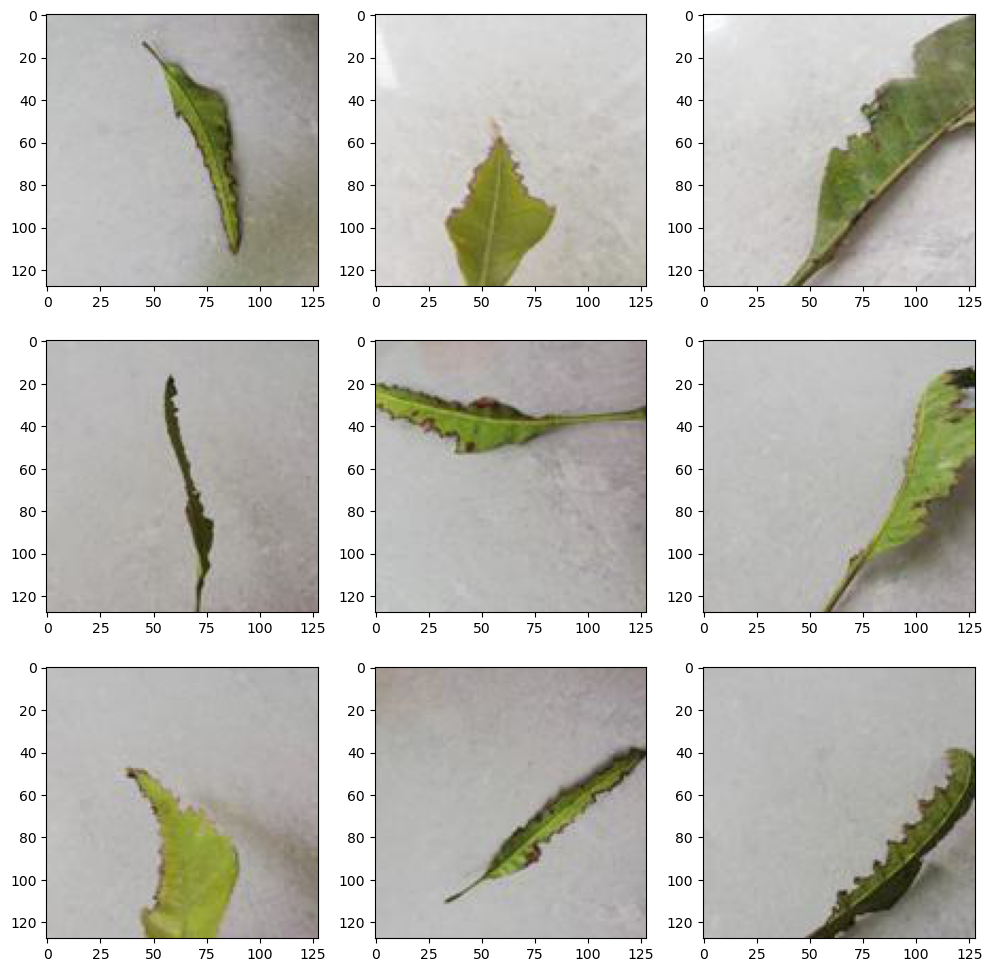

In [10]:
type = 'Bacterial Canker'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Bacterial+"/"+
                  os.listdir(Bacterial)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

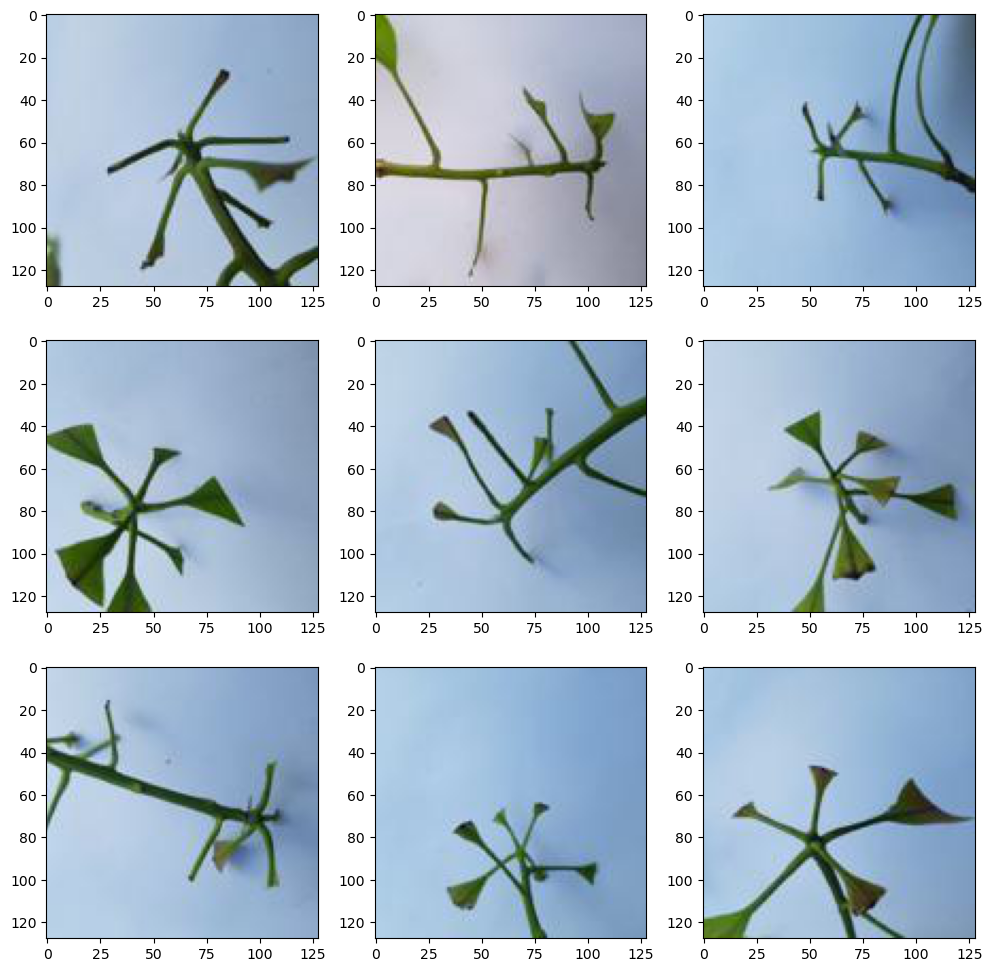

In [11]:
type = 'Cutting Weevil'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Cutting_Weevil+"/"+
                  os.listdir(Cutting_Weevil)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

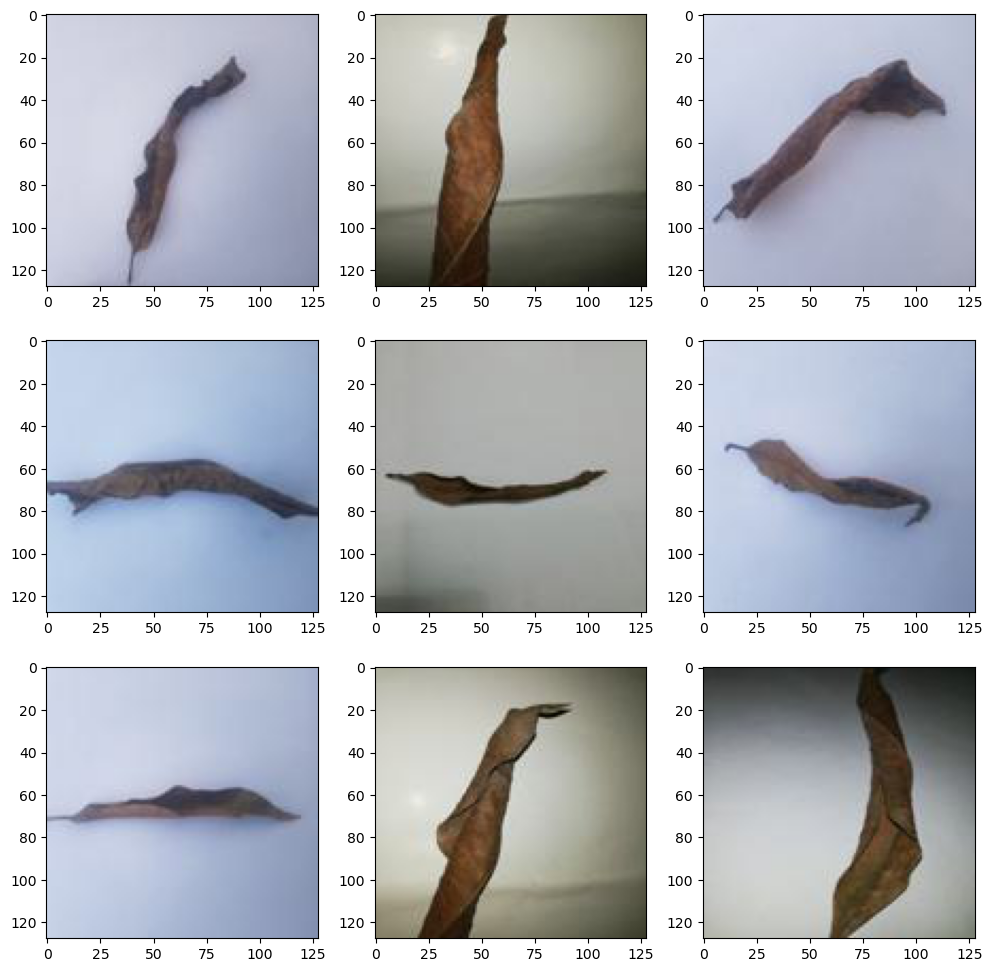

In [12]:
type = 'Die_Back'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Die_Back+"/"+
                  os.listdir(Die_Back)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

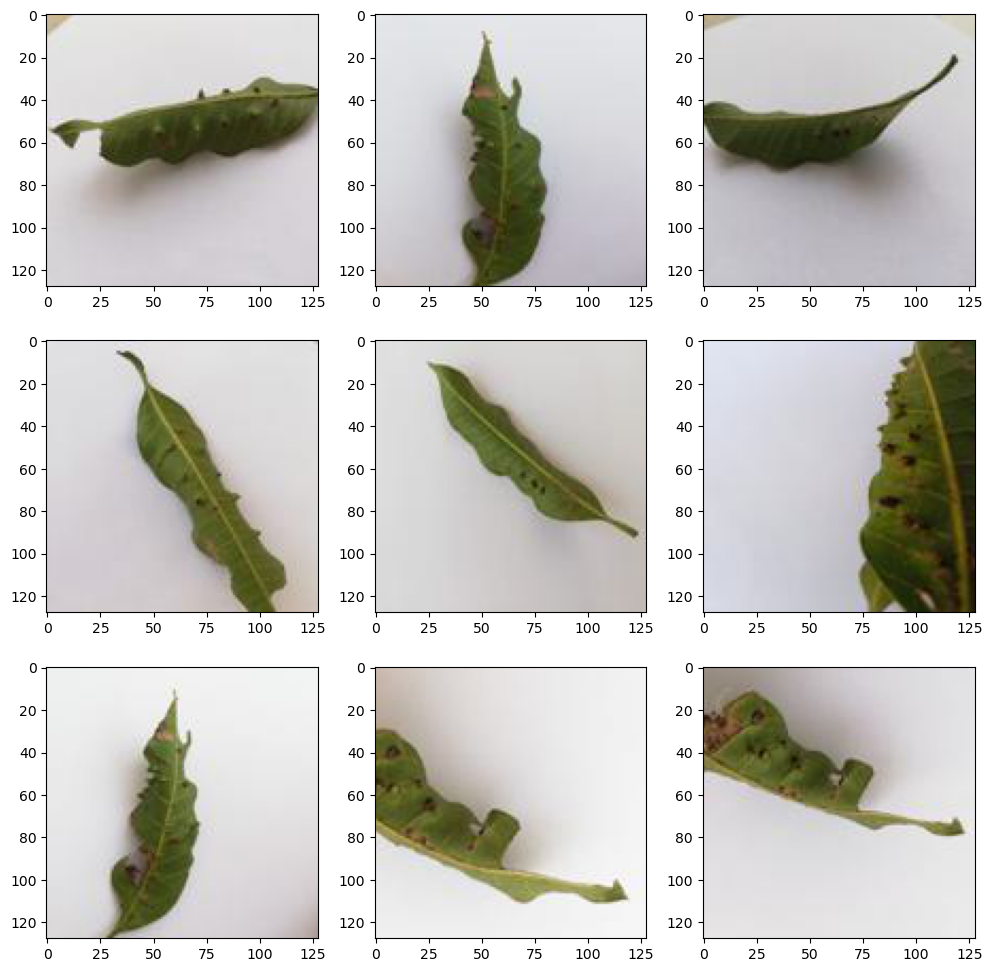

In [13]:
type = 'Gall'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Gall+"/"+
                  os.listdir(Gall)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

# Difference btw 128 and 64px images : Too much loss of data so choosing 128px

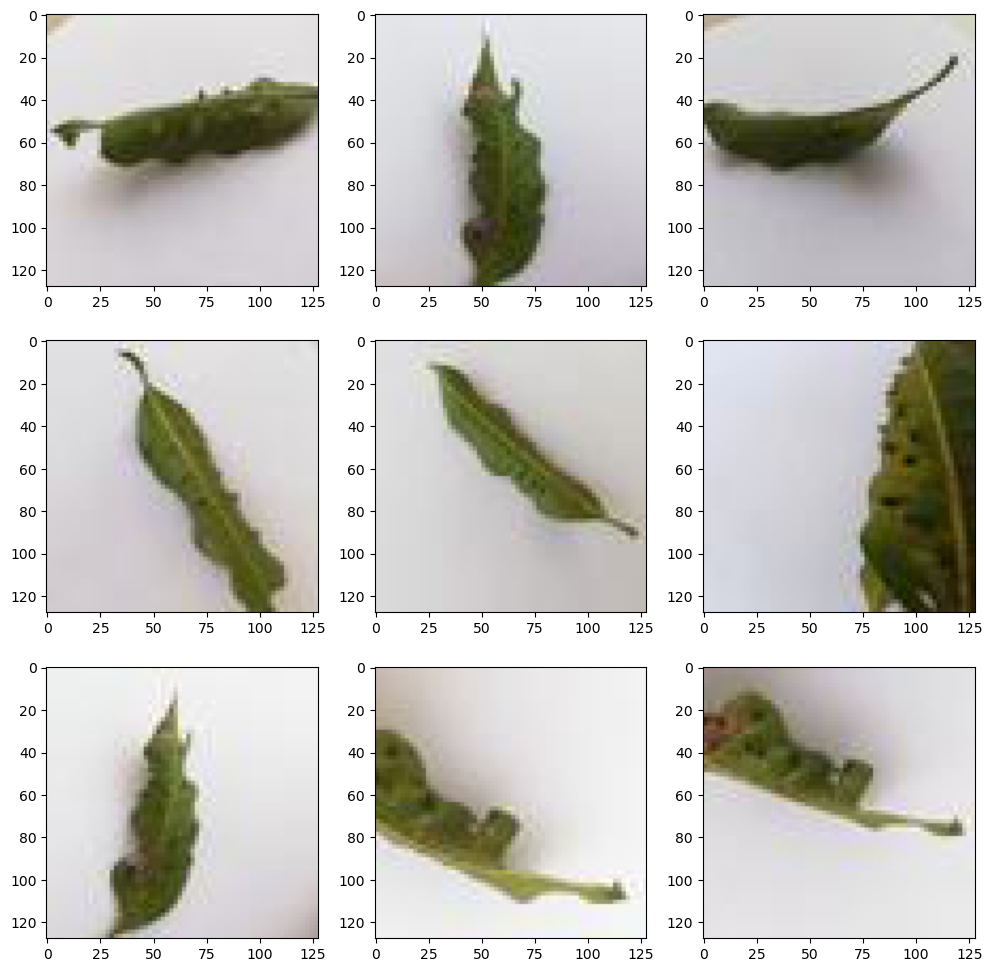

In [14]:
Gall2 = "/kaggle/working/resized_images2/Gall Midge"
type = 'Gall2'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Gall2+"/"+
                  os.listdir(Gall2)[i], target_size=(pic_size, pic_size))
    plt.imshow(img)   
plt.show()

# Implementing the KNN algorithm


In [17]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Set the path to the directory containing the images
path = '/kaggle/working/resized_images/'
dict1 = {
    'anth': 'Anthracnose/',
    'bact': 'Bacterial Canker/',
    'cut': 'Cutting Weevil/',
    'die': 'Die Back/',
    'gall': 'Gall Midge/',
    'heal': 'Healthy/',
    'powder': 'Powdery Mildew/',
    'sooty': 'Sooty Mould/'
}

# Set the size to resize the images to
size = (128, 128)

# Load the data and labels
data = []
labels = []

for category, folder in dict1.items():
    folder_path = os.path.join(path, folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize(size)
        img_array = np.array(img)
        img_array = img_array.flatten()
        data.append(img_array)
        labels.append(category)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

# Train the KNN classifier
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.645


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/kaggle/working/resized_images/'
img_height, img_width = 128, 128
batch_size = 32
num_classes = len(dict1)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # split the data into training and validation set

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Split the dataset
x_train, y_train = train_generator.next()
x_test, y_test = train_generator.next()

# Reshape the dataset
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Fit the KNN model
k = 3 # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# Evaluate the model
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Found 3200 images belonging to 8 classes.
Accuracy: 0.28125


In [20]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Set the path to the directory containing the images
path = '/kaggle/working/resized_images/'
dict1 = {
    'anth': 'Anthracnose/',
    'bact': 'Bacterial Canker/',
    'cut': 'Cutting Weevil/',
    'die': 'Die Back/',
    'gall': 'Gall Midge/',
    'heal': 'Healthy/',
    'powder': 'Powdery Mildew/',
    'sooty': 'Sooty Mould/'
}

# Set the size to resize the images to
size = (128, 128)

# Load the data and labels
data = []
labels = []

for category, folder in dict1.items():
    folder_path = os.path.join(path, folder)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize(size)
        img_array = np.array(img)
        img_array = img_array.flatten()
        data.append(img_array)
        labels.append(category)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

# Train the KNN classifier
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6375
